# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [62]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [35]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [36]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [37]:
XTrain, XTest, YTrain, YTest = train_test_split(X, y, test_size=0.14285)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

28114
26130
4342
40617
46438
38357


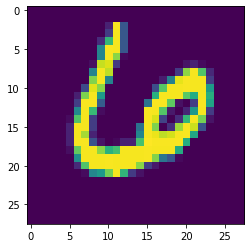

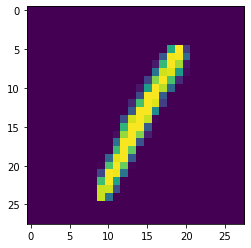

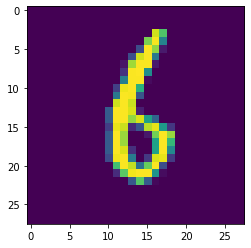

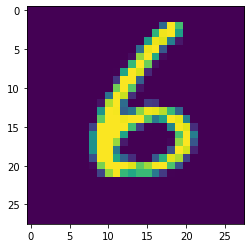

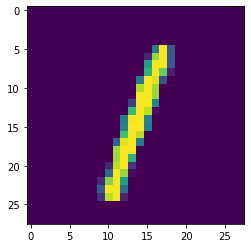

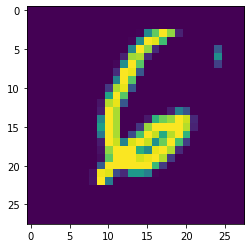

In [38]:
for i in range(6): 
    ranInt = np.random.randint(low=0, high=60000)
    print(ranInt)
    plt.figure()
    plt.imshow(np.reshape(XTrain[ranInt,:],(28,28))) 



### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [48]:
nbayes = GaussianNB()
slinear = linear_model.SGDClassifier(loss='log')
ranForest = RandomForestClassifier()

nbayes.fit(XTrain,YTrain)
slinear.fit(XTrain,YTrain)
ranForest.fit(XTrain,YTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
print(accuracy_score(YTrain,nbayes.predict(XTrain)))
print(confusion_matrix(YTrain,nbayes.predict(XTrain)))

0.5482833333333333
[[5125   13   30   18   15   12  272    6  295  182]
 [   3 6324   14   23    2    9   89    4  145   77]
 [ 454  172 1789  397   28   23 1589   17 1419  112]
 [ 257  329   52 2086   11   11  386   44 2126  764]
 [ 105   38   49   24  966   32  612   24 1051 2956]
 [ 491  141   31  118   26  266  353   10 3339  685]
 [  44   99   28    2    4   19 5591    0  117   10]
 [  20   44    7   49   50    6   22 1774  177 4111]
 [  76  786   25   48   27   29  116    7 3302 1399]
 [  26   37   18    8   32    3    5   71   96 5674]]


In [50]:
print(accuracy_score(YTrain,slinear.predict(XTrain)))
print(confusion_matrix(YTrain,slinear.predict(XTrain)))

0.8888
[[5810    0   12    5    6   34   14    2   78    7]
 [   2 6030   25    9    0  106   10   14  462   32]
 [  53   13 4934  123   79  180   60   59  470   29]
 [  15    4   47 5090   10  431   12   31  335   91]
 [   9    6    7    3 5118   43   28   18  355  270]
 [  42    9    9  137   29 4682   29   16  446   61]
 [  31    3   33    2   33  298 5417    0   92    5]
 [  28    6   20   21   48   31    7 5700  112  287]
 [  19   13   10   69   16  283    6   19 5304   76]
 [  23    5    4   54  106  102    2  140  291 5243]]


In [51]:
print(accuracy_score(YTrain,ranForest.predict(XTrain)))
print(confusion_matrix(YTrain,ranForest.predict(XTrain)))

1.0
[[5968    0    0    0    0    0    0    0    0    0]
 [   0 6690    0    0    0    0    0    0    0    0]
 [   0    0 6000    0    0    0    0    0    0    0]
 [   0    0    0 6066    0    0    0    0    0    0]
 [   0    0    0    0 5857    0    0    0    0    0]
 [   0    0    0    0    0 5460    0    0    0    0]
 [   0    0    0    0    0    0 5914    0    0    0]
 [   0    0    0    0    0    0    0 6260    0    0]
 [   0    0    0    0    0    0    0    0 5815    0]
 [   0    0    0    0    0    0    0    0    0 5970]]


### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [55]:
nbayesTestAcc = accuracy_score(YTest,nbayes.predict(XTest))
nbayesTestAccF1 = f1_score(YTest,nbayes.predict(XTest),average='micro')

slinearTestAcc = accuracy_score(YTest,slinear.predict(XTest))
slinearTestAccF1 = f1_score(YTest,slinear.predict(XTest),average='micro')

ranForestTestAcc = accuracy_score(YTest,ranForest.predict(XTest))
ranForestTestAccF1 = f1_score(YTest,ranForest.predict(XTest),average='micro')

In [61]:
print("Test native bayes:", nbayesTestAcc)
print("F-Measure native bayes: ", nbayesTestAccF1)
print("Test single linear: ", slinearTestAcc)
print("F-Measure single linear: ", slinearTestAccF1)
print("Test random forest: ", ranForestTestAcc)
print("F-Measure random forest: ",ranForestTestAccF1)


Test native bayes: 0.5525
F-Measure native bayes:  0.5525
Test single linear:  0.875
F-Measure single linear:  0.875
Test random forest:  0.9659
F-Measure random forest:  0.9659


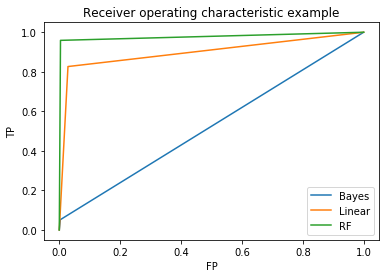

In [82]:
#review, what does this do?
y_five = YTest=='5'
bayes_five = nbayes.predict(XTest).astype(int)==5
linear_five = slinear.predict(XTest).astype(int)==5
rf_five = ranForest.predict(XTest).astype(int)==5

#true positives and false positives for each method
nbayesfp, bayestp, _ = roc_curve(y_five, bayes_five)
slinearfp, slineartp, _ = roc_curve(y_five, linear_five)
ranForestfp, ranForesttp, _ = roc_curve(y_five, rf_five)

lw = 2
plt.plot(bayes_fpr, bayes_tpr, label='Bayes')
plt.plot(linear_fpr, linear_tpr, label='Linear')
plt.plot(rf_fpr, rf_tpr, label='RF')
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('Receiver operating characteristic example')
plt.legend()
plt.show()
